[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


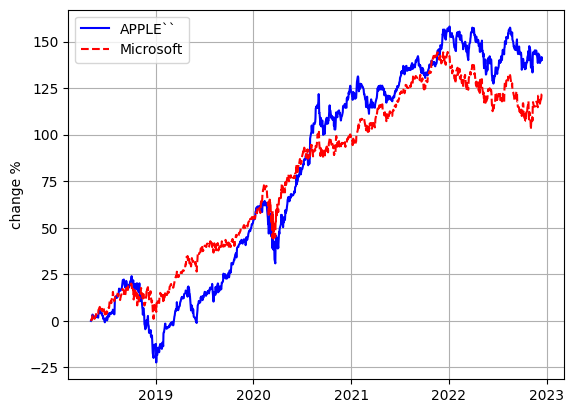

In [2]:
# APPL, MSFT 주식 수익률 비교
from pandas_datareader import data as pdr
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2018-05-04") # 939
aapl_dpc = (aapl["Close"]-aapl['Close'].shift(1)) / aapl['Close'].shift(1) * 100
aapl_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
aapl_dpc_cs = aapl_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT',start="2018-05-04")
msft_dpc = (msft["Close"]-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.plot(aapl.index, aapl_dpc_cs, 'b', label="APPLE``")
plt.plot(msft.index, msft_dpc_cs, 'r--', label="Microsoft")
plt.ylabel("change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


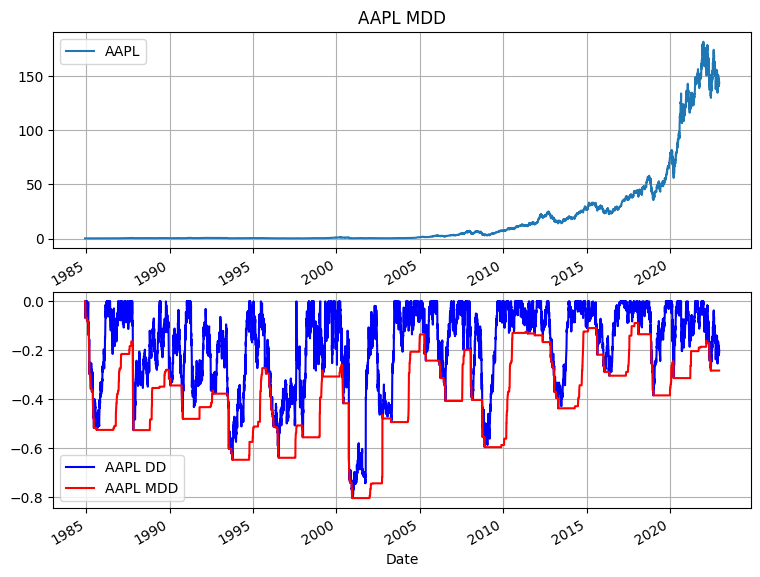

Date
2000-12-19   -0.805808
2000-12-20   -0.805808
2000-12-21   -0.805808
2000-12-22   -0.805808
2000-12-26   -0.805808
                ...   
2001-12-18   -0.805808
2001-12-19   -0.805808
2001-12-20   -0.805808
2001-12-21   -0.805808
2001-12-24   -0.805808
Name: Adj Close, Length: 252, dtype: float64

In [6]:
# Max Draw Down 최대 손실 낙폭
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

# 1984년 12월 01일부터 AAPL데이터를 불러온다.
aapl = pdr.get_data_yahoo("aapl", "1984-12-01")

window = 252 # 어림잡아 1년동안 개장일
peak = aapl['Adj Close'].rolling(window, min_periods=1).max()
drawdown = aapl['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
aapl["Close"].plot(label="AAPL",title="AAPL MDD", grid=True, legend=True)
plt.subplot(212) # 2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label="AAPL DD", grid=True, legend=True)
max_dd.plot(c="red", label="AAPL MDD", grid=True, legend=True)
plt.show()

# 최대 낙폭은 약 80% 정도로 볼 수 있다.
max_dd[max_dd == max_dd.min()]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


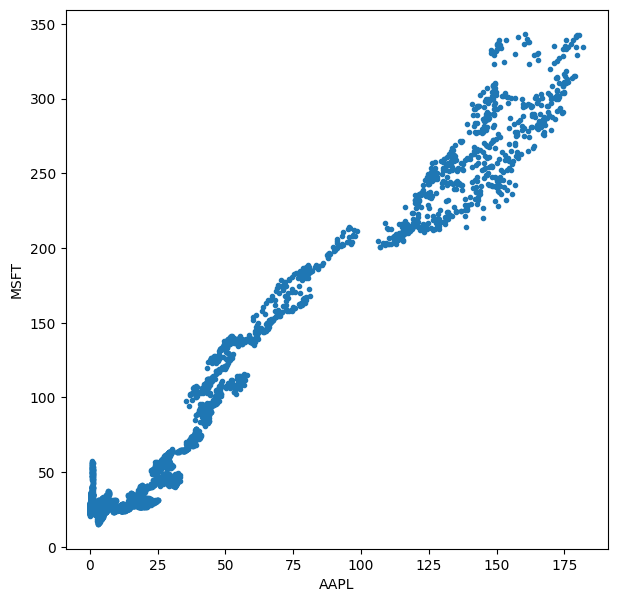

In [1]:
# scatter plot 산점도 분석
# 점의 분포가 y=x인 직선 형태에 가까울수록 직접적인 관계가 있다.
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

AAPL = pdr.get_data_yahoo("AAPL","2000-01-04")
MSFT = pdr.get_data_yahoo("MSFT","2000-01-04")
df = pd.DataFrame({"AAPL": AAPL["Close"], "MSFT": MSFT["Close"]})
df = df.fillna(method="bfill") # NaN 데이터를 삭제한다
df = df.fillna(method="ffill") # NaN 데이터를 삭제한다

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(df['AAPL'], df['MSFT'], marker='.')
plt.xlabel("AAPL")
plt.ylabel("MSFT")
plt.show()

# 매우 높은 상관관계를 가지는 그래프를 볼 수 있다.